# First-order Theorem proving. Доказательство теоремы первого порядка.

Хотим предсказать, какая из пяти эвристик будет обеспечивать самое быстрое доказательство теоремы, учитывая данные полученные из теоремы. Шестое возможное предсказание заключается в том, что теорема не была доказана за выделенное время.

Подключим библиотеки, загрузим данные.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('C://MO//train.csv', sep = ',', header=None, engine = 'python')

Посмотрим на выборку данных. Последние 6 столбцов - категории классификации: H1-H5 - эвристики, содержащие +1, если соответствующие эвристика обнаружила доказательство и была самой быстрой для этого, и -1 в противном случае, H0 - последний столбец, содержит в себе +1, где эвристика не находит доказательство в течение срока и -1 в противном случае.

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1.489500,0.816880,2.116800,1.78360,1.53460,-0.305430,-1.24770,-0.14537,-0.593560,-0.233160,...,-0.48278,1.46300,0.270150,-1.555900,-1,-1,-1,-1,-1,1
1,1.489500,0.816880,2.116800,1.78950,1.54030,-0.318500,-1.24770,-0.14537,-0.593560,-0.233160,...,-0.48278,1.48010,0.213610,-1.555900,1,-1,-1,-1,-1,-1
2,1.489500,0.816880,2.116800,1.78360,1.53460,-0.305430,-1.24770,-0.14537,-0.593560,-0.233160,...,-0.48278,1.47440,0.232450,-1.555900,-1,-1,-1,-1,-1,1
3,1.489500,0.816880,2.116800,1.78360,1.53460,-0.305430,-1.24770,-0.14537,-0.593560,-0.233160,...,-0.48278,1.44010,0.345530,-1.555900,-1,-1,-1,-1,-1,1
4,1.489500,0.816880,2.116800,1.78360,1.53460,-0.305430,-1.24770,-0.14537,-0.593560,-0.233160,...,-0.48278,1.44580,0.326690,-1.555900,-1,-1,-1,-1,-1,1
5,1.489500,0.816880,2.116800,1.78950,1.54030,-0.318500,-1.24770,-0.14537,-0.593560,-0.233160,...,-0.48278,1.46300,0.270150,-1.555900,-1,-1,-1,-1,-1,1
6,1.489500,0.816880,2.116800,1.78950,1.54030,-0.318500,-1.24770,-0.14537,-0.593560,-0.233160,...,-0.48278,1.47440,0.232450,-1.555900,-1,-1,-1,-1,-1,1
7,1.489500,0.816880,2.116800,1.78950,1.54030,-0.318500,-1.24770,-0.14537,-0.593560,-0.233160,...,-0.48278,1.44010,0.345530,-1.555900,-1,-1,-1,-1,-1,1
8,1.489500,0.816880,2.116800,1.78950,1.54030,-0.318500,-1.24770,-0.14537,-0.593560,-0.233160,...,-0.48278,1.44010,0.345530,-1.555900,-1,-1,-1,-1,-1,1
9,1.489500,0.816880,2.116800,1.78950,1.54030,-0.318500,-1.24770,-0.14537,-0.593560,-0.233160,...,-0.48278,1.44010,0.345530,-1.555900,-1,-1,-1,-1,-1,1


Посмотрим на размер таблицы данных.

In [4]:
data.shape

(3059, 57)

Таблица содержит 3059 строк (объектов) и 57 столбцов (признаков)

Посмотрим на несколько первых объектов

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4630,0.27015,-1.5559,-1,-1,-1,-1,-1,1
1,1.4895,0.81688,2.1168,1.7895,1.5403,-0.31850,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4801,0.21361,-1.5559,1,-1,-1,-1,-1,-1
2,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4744,0.23245,-1.5559,-1,-1,-1,-1,-1,1
3,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4401,0.34553,-1.5559,-1,-1,-1,-1,-1,1
4,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4458,0.32669,-1.5559,-1,-1,-1,-1,-1,1


Посмотрим на несколько последних объектов

In [6]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
3054,-1.1052,-0.19595,-0.91764,-1.06520,-1.1126,-0.51352,1.1920,0.12703,0.16799,-0.50533,...,-0.48990,-0.56332,-0.46486,0.70936,-1,-1,-1,-1,-1,1
3055,-1.0496,-0.11375,-0.88440,-0.99893,-1.1126,-0.51352,1.1920,0.12703,0.15658,-0.50533,...,-0.42624,-0.52892,-0.46486,0.67471,-1,-1,-1,-1,-1,1
3056,-1.0218,-0.11375,-0.88440,-0.99893,-1.1126,-0.51352,1.1920,0.12703,0.15278,-0.50533,...,-0.42165,-0.51049,-0.46486,0.65616,-1,-1,-1,-1,-1,1
3057,-1.0506,-0.17792,-0.82085,-1.00010,-1.0516,-0.51996,1.1401,0.12703,0.15258,-0.50533,...,-0.41975,-0.50288,-0.46486,0.64849,-1,-1,-1,-1,-1,1
3058,-1.0491,-0.12227,-0.91704,-1.03180,-1.1440,-0.51022,1.2186,0.12703,0.16056,-0.50533,...,-0.42226,-0.51294,-0.46486,0.65862,-1,-1,-1,-1,-1,1


Зададим столбцам произвольные имена. Последние 6 столбцов - эвристики.

In [7]:
data.columns = ['A' + str(i) for i in range(1, 52)] + ['H' + str(j) for j in range(1, 6)]+['H0']
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A48,A49,A50,A51,H1,H2,H3,H4,H5,H0
0,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4630,0.27015,-1.5559,-1,-1,-1,-1,-1,1
1,1.4895,0.81688,2.1168,1.7895,1.5403,-0.31850,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4801,0.21361,-1.5559,1,-1,-1,-1,-1,-1
2,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4744,0.23245,-1.5559,-1,-1,-1,-1,-1,1
3,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4401,0.34553,-1.5559,-1,-1,-1,-1,-1,1
4,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4458,0.32669,-1.5559,-1,-1,-1,-1,-1,1


Приведём формат выходных столбцов классификации к удобному виду - из 6 столбцов сделаем один, но с несколькими значениями. Значение 1 -принадлежность к эвристике H1, 2 - к H2 и т.д. 0 - принадлежность к эвриситики H0.

In [8]:
Col=[]
for c in range(0, data.shape[0]) :
          if data['H1'][c] == 1.0:k=1
          elif data['H2'][c] == 1.0:k=2
          elif data['H3'][c] == 1.0:k=3
          elif data['H4'][c] == 1.0:k=4
          elif data['H5'][c] == 1.0:k=5
          elif data['H0'][c] == 1.0:k=0
          Col.append(k)

Удалим из данных старые выходные столбцы. И добавим в данные новый выходной столбец.

In [9]:
data = data.drop(['H0','H1','H2','H3','H4','H5'], axis=1)

In [10]:
data['Evristic']=Col

Проверим корректность выполненной операции:

In [11]:
data['Evristic'].unique()

array([0, 1, 3, 4, 2, 5], dtype=int64)

Выходной столбец содержит целые числа: 0,1,2,3,4,5

Посмотрим на результат:

In [12]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A43,A44,A45,A46,A47,A48,A49,A50,A51,Evristic
0,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6803,-0.48278,1.4630,0.27015,-1.5559,0
1,1.4895,0.81688,2.1168,1.7895,1.5403,-0.31850,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6974,-0.48278,1.4801,0.21361,-1.5559,1
2,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6917,-0.48278,1.4744,0.23245,-1.5559,0
3,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6575,-0.48278,1.4401,0.34553,-1.5559,0
4,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6632,-0.48278,1.4458,0.32669,-1.5559,0


Выводим название всех столбцов:

In [13]:
print(data.columns)

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41',
       'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51',
       'Evristic'],
      dtype='object')


Посмотрим типы столбцов:

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 52 columns):
A1          3059 non-null float64
A2          3059 non-null float64
A3          3059 non-null float64
A4          3059 non-null float64
A5          3059 non-null float64
A6          3059 non-null float64
A7          3059 non-null float64
A8          3059 non-null float64
A9          3059 non-null float64
A10         3059 non-null float64
A11         3059 non-null float64
A12         3059 non-null float64
A13         3059 non-null float64
A14         3059 non-null float64
A15         3059 non-null float64
A16         3059 non-null float64
A17         3059 non-null float64
A18         3059 non-null float64
A19         3059 non-null float64
A20         3059 non-null float64
A21         3059 non-null float64
A22         3059 non-null float64
A23         3059 non-null float64
A24         3059 non-null float64
A25         3059 non-null float64
A26         3059 non-null float64
A27      

Видно, что первые 51 столбец имеют тип float, а последний - тип int. То есть у нас содержатся только чисовые признаки, без категориальных.

Получим некоторую сводную информацию по всей таблице:

In [15]:
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A43,A44,A45,A46,A47,A48,A49,A50,A51,Evristic
count,3059.000000,3059.000000,3059.000000,3.059000e+03,3.059000e+03,3.059000e+03,3059.000000,3.059000e+03,3.059000e+03,3059.000000,...,3059.000000,3059.000000,3059.000000,3.059000e+03,3059.000000,3059.000000,3059.000000,3059.000000,3059.000000,3059.000000
mean,-0.000001,0.000002,-0.000001,-9.520105e-07,-6.697287e-07,8.998169e-07,0.000007,3.223276e-07,-4.746322e-08,0.000004,...,0.000003,0.000003,-0.000001,4.961589e-07,0.000003,0.000001,-0.000003,0.000002,0.000001,1.603465
std,0.999995,1.000001,0.999997,1.000002e+00,9.999996e-01,1.000002e+00,0.999990,9.999945e-01,9.999981e-01,1.000011,...,1.000008,1.000007,1.000000,9.999962e-01,1.000004,0.999999,0.999992,1.000001,0.999996,1.772916
min,-1.105200,-3.735600,-0.984110,-1.065200e+00,-1.240100e+00,-8.805800e-01,-1.763800,-8.263700e-01,-7.099500e-01,-0.913580,...,-0.112290,-0.578340,-2.403700,-5.454100e-01,-0.556780,-0.489900,-0.784590,-0.464860,-2.131800,0.000000
25%,-0.778170,-0.754475,-0.607170,-7.434000e-01,-7.948000e-01,-6.181700e-01,-0.960320,-4.177700e-01,-3.744400e-01,-0.641410,...,-0.112290,-0.578340,-0.450310,-5.454100e-01,-0.556780,-0.489900,-0.727190,-0.464860,-0.394780,0.000000
50%,-0.449500,0.425360,-0.474750,-3.662000e-01,-4.060000e-01,-3.107400e-01,0.504930,-2.815700e-01,-2.021700e-01,-0.369240,...,-0.112290,-0.498980,0.043819,-4.090100e-01,-0.499500,-0.432510,-0.474310,-0.305720,0.478270,1.000000
75%,0.719295,0.831520,0.256640,7.014600e-01,5.623900e-01,8.671200e-02,0.819885,3.994300e-01,1.560600e-01,-0.097070,...,0.026975,-0.143280,0.990180,-1.403250e-01,-0.175735,-0.239450,0.243580,0.087767,0.675785,3.000000
max,2.009400,0.831520,2.738100,2.644800e+00,2.366200e+00,7.194500e+00,1.439300,3.227000e+01,1.549500e+01,4.257700,...,54.273000,2.411100,0.990180,3.457600e+00,2.479300,3.298200,2.257900,9.561500,0.932190,5.000000


Выводятся: общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей

Видно, что общее количество объектов 3059 во всех столбцах, то есть пропущенных значений нет.

Построим диаграмму рассеяния для некоторых признаков.

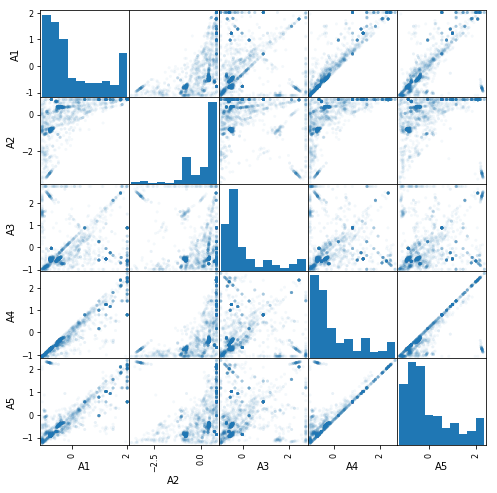

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['A1','A2','A3','A4','A5']], alpha=0.05, figsize=(8, 8));
pass

Построим корреляционную матрицу

In [17]:
data.corr()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A43,A44,A45,A46,A47,A48,A49,A50,A51,Evristic
A1,1.000000,0.582014,0.169084,0.946040,0.775041,0.392710,-0.843996,-0.354606,-0.422694,-0.080974,...,-0.052603,0.771105,0.525321,-0.049959,0.763009,0.660066,0.646497,-0.103768,-0.619351,-0.067680
A2,0.582014,1.000000,-0.210563,0.570910,0.177427,0.169948,-0.224503,-0.332752,-0.314383,0.236393,...,-0.078434,0.387037,0.766805,-0.328554,0.383854,0.328807,0.153484,-0.070428,-0.133046,-0.085341
A3,0.169084,-0.210563,1.000000,0.089203,0.324146,0.373476,-0.434777,0.211826,-0.053938,-0.230939,...,-0.049099,0.150381,-0.224271,0.833800,0.135032,-0.022317,0.256024,0.245832,-0.332957,0.013709
A4,0.946040,0.570910,0.089203,1.000000,0.831298,0.146012,-0.797677,-0.342605,-0.414852,-0.034587,...,-0.049650,0.763648,0.567026,-0.065680,0.764144,0.648627,0.638768,-0.135670,-0.601817,-0.074398
A5,0.775041,0.177427,0.324146,0.831298,1.000000,0.076798,-0.920916,-0.233607,-0.409808,-0.099300,...,-0.049033,0.651959,0.241915,0.169027,0.651486,0.553854,0.728919,-0.155525,-0.686537,-0.036866
A6,0.392710,0.169948,0.373476,0.146012,0.076798,1.000000,-0.459334,-0.107008,-0.097421,-0.215903,...,-0.031146,0.345310,0.023010,0.115327,0.323570,0.331247,0.302776,0.271066,-0.387751,-0.010409
A7,-0.843996,-0.224503,-0.434777,-0.797677,-0.920916,-0.459334,1.000000,0.249950,0.403179,0.172866,...,0.055859,-0.715808,-0.224514,-0.195667,-0.706889,-0.622911,-0.767744,0.032592,0.763205,0.036913
A8,-0.354606,-0.332752,0.211826,-0.342605,-0.233607,-0.107008,0.249950,1.000000,0.622106,-0.155666,...,-0.000491,-0.249218,-0.263559,0.274018,-0.259801,-0.279616,-0.225531,0.113225,0.192522,0.027400
A9,-0.422694,-0.314383,-0.053938,-0.414852,-0.409808,-0.097421,0.403179,0.622106,1.000000,-0.154205,...,0.019978,-0.290356,-0.252947,0.064913,-0.292883,-0.253051,-0.300966,0.078336,0.279152,0.019032
A10,-0.080974,0.236393,-0.230939,-0.034587,-0.099300,-0.215903,0.172866,-0.155666,-0.154205,1.000000,...,0.003873,-0.111817,0.141368,-0.143015,-0.105567,-0.100736,-0.121694,-0.148216,0.167848,-0.192642


Построим график зависимости признакак A1 от A4

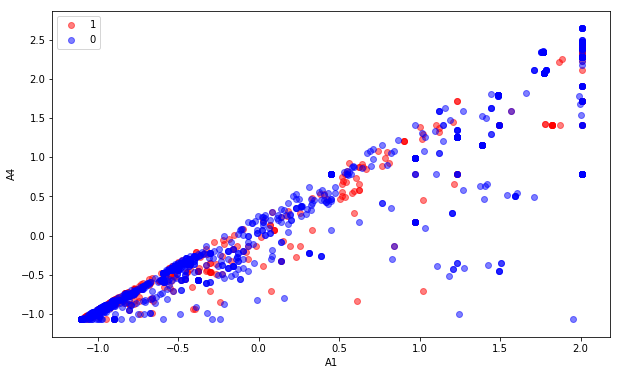

In [18]:
col1 = 'A1'
col2 = 'A4'
plt.figure(figsize=(10, 6))

plt.scatter(data[col1][data['Evristic'] == 1],
            data[col2][data['Evristic'] == 1],
            alpha=0.5,
            color='red',
            label='1')
plt.scatter(data[col1][data['Evristic'] == 0],
            data[col2][data['Evristic'] == 0],
            alpha=0.5,
            color='blue',
            label='0')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

По таблице и графику видно, что А1 достаточно сильно коррелирует с А4 (0.94) 

Данные представлены уже в нормализованном виде. Так что нормализация не нужна

Векторизация также не нужна, так как данные числовые, бинарные признаки остуствуют.

Создаём наборы данных выходных и входных данных 

Разделяем данные на входные признаки(столбец X) и выходные (столбец Y)

In [19]:
X = data.drop(['Evristic'], axis=1)
Y = data['Evristic']

Смотрим размер

In [20]:
print (X.shape)
print (Y.shape)
N, d = X.shape

(3059, 51)
(3059,)


Имеем 51 входной признак. И 1 выходной признак.

Поделим наши данные на обучающую и тестовую выборку в отношении 70 на 30 (70% - обучающая выборка, 30% - тестовая)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 43)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2141 918


# kNN - метод ближайших соседей

Обучим модель для 3х ближайших соседей

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Теперь можем предсказывать значение целевого признака по входным признакам для новых объектов.

In [23]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (err_train, err_test)

0.289584306399 0.471677559913


Имеем ошибку 28.9% на обучающей выборке, и 47.1% на тестовой.

Попробуем найти лучший параметр k метода kNN

In [28]:
from sklearn.grid_search import GridSearchCV
n_neighbors_array = [1, 2,3,5,15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.4778141055581504 2


Имеем ошибку 47.7% при параметре kNN при количестве ближайших соседей k = 2.
Обучаем нашу модель для данного параметра.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [30]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (err_train, err_test)

0.23914058851 0.461873638344


Имеем ошибку 24% на обучающей выборке, и 47.9% на тестовой при параметре kNN k=2.

# Дз №2

## Обучение нейронной сети

Разбиваем данные на обучающую и тестувую выборки. 30 на 70

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2141 918


Обучаем классификатор для одного скрытого слоя из 70 нейронов.

In [32]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (70, ), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42, max_iter=500)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(70,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Предсказываем значение выходного признака на обучающей и тестовой выборках.

In [33]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Выводим ошибки на обучающей и тестовой выборках.

In [34]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0980850070061 0.505446623094


Имеем 9.8% на обучающей выборке и 50.5% на тестовой.

Подберем оптимальное значение параметра регуляризации alpha для однослойной НС со 70 нейронами.

In [35]:
alpha_arr = np.arange(0,1,0.1)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (70, ), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

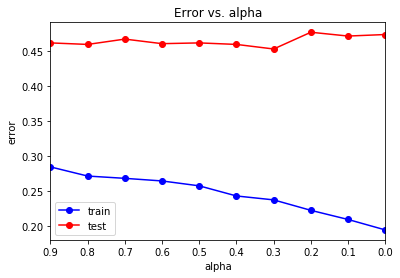

In [36]:
plt.plot(alpha_arr, train_err, 'b-o', label = 'train')
plt.plot(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Из графика видно, что при увеличении параметра alpha ошибка увеличивается на тестовой выборке.
Найдём минимальную ошибку:

In [37]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.194301728164 0.453159041394


In [38]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print('Оптимальное aplha = ', alpha_opt)

Оптимальное aplha =  0.3


Классификатор при найденном оптимальном значении alpha:

In [40]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (70,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Ошибка на обучающей выборке: ', np.mean(y_train != y_train_pred))
print('Ошибка на тестовой выборке: ',np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.237272302662
Ошибка на тестовой выборке:  0.453159041394


Подберём оптимальное значение нейронов для оптимального параметра alpha

In [41]:
neur_arr = [5, 7, 10,20,30,40,50,60,70,80,90,100,150,200]
test_err = []
train_err = []
for neur in neur_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neur, ), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

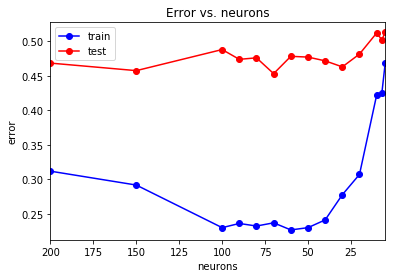

In [42]:
plt.plot(neur_arr, train_err, 'b-o', label = 'train')
plt.plot(neur_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(neur_arr), np.min(neur_arr)])
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()
pass

Как видно из графика, ошибка при количестве нейронов, меньше 50 и больше 100, только увеличивается на обучающей выборке. 

In [43]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.2269967305 0.453159041394


Имеем минималбную ошибку 22.6% на обучающей выборке и 45.3% на тестовой.

Теперь рассмотрим двухслойную НС по 70 нейронов.

In [44]:
mlp_model = MLPClassifier(hidden_layer_sizes = (70, 70), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(70, 70), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [45]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.232134516581 0.468409586057


Ошибка на обучающей выборке 23.2%, на тестовой 46.8%.

Посмотрим на параметр альфа для двухслойной НС

In [46]:
alpha_arr = np.arange(0,1,0.1)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (70,70), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

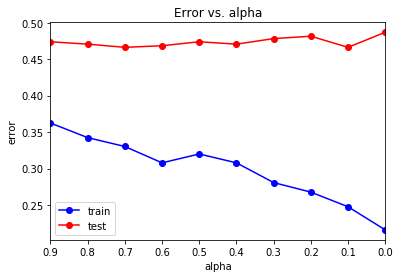

In [47]:
plt.plot(alpha_arr, train_err, 'b-o', label = 'train')
plt.plot(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

По графику видно, что тем меньше alpha, тем меньше ошибка.

In [48]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.215787015413 0.466230936819


In [49]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print( alpha_opt)

0.1


Имеем ошибку в 21.5% на обучающей выборке и 46.6% на тестовой при параметре aplpha=0.1. То есть ошибка не особо меньше, чем на однослойной сети, следовательно не имеет смысла использовать двухслойную НС.

# ДЗ №3

## Random forests

Разобьём данные:

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

Количество деревьев решений = 100

In [51]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0117130307467 0.423762376238


Получили 1.1% ошибка на обучающей выборке, что уже хорошо, но имеем ошибку в 42.3% на тестовой.

Посмотрим на разное количество деревьев решений 

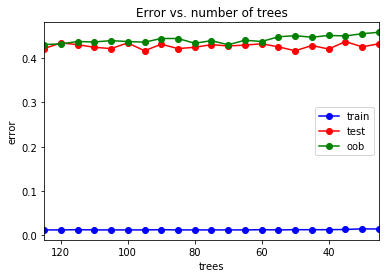

In [53]:
trees_arr = np.arange(25, 126, 5)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = trees, oob_score=True)
    rf.fit(X_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_test)))
    oob_err.append(1 - rf.oob_score_)

plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [54]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.0117130307467
Минимальная ошибка на тестовой выборке:  0.416831683168


# Extremely Randomized Trees

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [56]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка на обучающей выборке = ',err_train)
print('Ошибка на тестовой выборке = ',err_test)

Ошибка на обучающей выборке =  0.0122010736945
Ошибка на тестовой выборке =  0.431683168317


Посмотрим на разное количество деревьев решений:

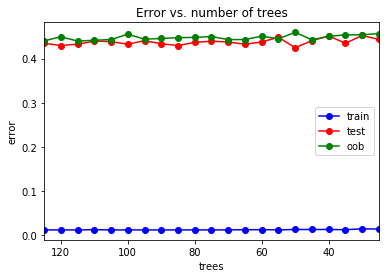

In [59]:
trees_arr = np.arange(25, 126, 5)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = trees, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [60]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0122010736945 0.424752475248


In [61]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

50


# AdaBoost

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [63]:
ab = ensemble.AdaBoostClassifier(n_estimators = 100)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [64]:
err_train = np.mean(y_train != ab.predict(X_train))
err_test  = np.mean(y_test  != ab.predict(X_test))

print(err_train, err_test)

0.479258174719 0.570297029703


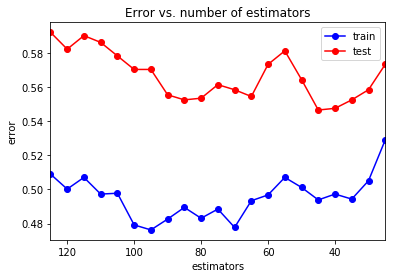

In [65]:
estim_arr = np.arange(25, 126, 5)
test_err = []
train_err = []
for estim in estim_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = estim)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test  != ab.predict(X_test)))

plt.plot(estim_arr, train_err, 'b-o', label = 'train')
plt.plot(estim_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(estim_arr), np.min(estim_arr)])
plt.title('Error vs. number of estimators')
plt.xlabel('estimators')
plt.ylabel('error')
plt.legend()
pass

In [66]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.476329917033
Минимальная ошибка на тестовой выборке:  0.546534653465


# Gradient Boosted Trees

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

Обучаем классификатор вида Gradient Boosted Trees. Число деревьев = 100

In [68]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [70]:
err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))

print('Ошибка на обучающей выборке:', err_train)
print('Ошибка на тестовой выборке:', err_test)

Ошибка на обучающей выборке: 0.196681307955
Ошибка на тестовой выборке: 0.452475247525


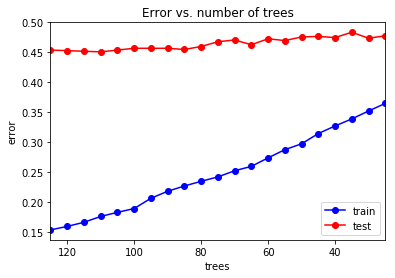

In [71]:
trees_arr = np.arange(25, 126, 5)
test_err = []
train_err = []
for trees in trees_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = trees)
    gbt.fit(X_train, y_train)
    train_err.append(np.mean(y_train != gbt.predict(X_train)))
    test_err.append(np.mean(y_test  != gbt.predict(X_test)))

plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [72]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.153733528551 0.450495049505


In [74]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print('Оптимальное количество деревьев:', trees_opt)

Оптимальное количество деревьев: 110


# ДЗ№4

## Principal component analysis (PCA)

Исходный размер выборки равен 51

In [75]:
X.shape

(3059, 51)

Уменьшим размерность исходных данных при помощи метода PCA (principal component analysis) с количеством компонент равным 20:

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [77]:
pca_x = pca.transform(X)

Посмотрим на размерность после применения PCA.

In [78]:
pca_x.shape

(3059, 20)

Разбиваем данные на обучающую и тестовую выборки.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(pca_x, Y, test_size = 0.33, random_state = 7)

In [80]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [81]:
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0112249877989 0.449504950495


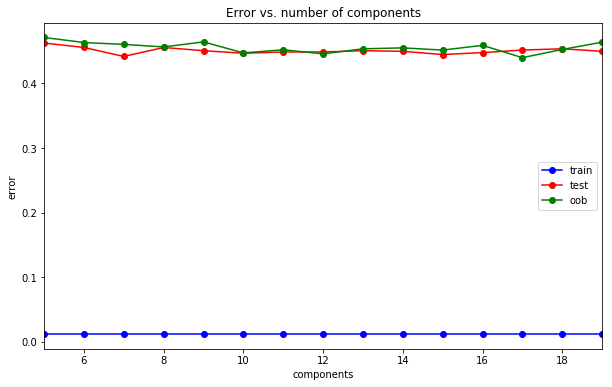

In [82]:
components_arr = np.arange(5, 20, 1)
test_err = []
train_err = []
oob_err = []
for components in components_arr:
    pca = PCA(n_components = components)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.33, random_state = 42)

    ert = ensemble.ExtraTreesClassifier(n_estimators = 100, bootstrap = True, oob_score = True)
    ert.fit(X_train, y_train)
    
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

plt.figure(figsize = (10, 6))
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('Error vs. number of components')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

In [83]:
print("Минимальная ошибка:")
print(np.min(train_err), np.min(test_err))
print("Оптимальное количество компонент:")
print(components_arr[test_err == np.min(test_err)][0])

Минимальная ошибка:
0.0122010736945 0.441584158416
Оптимальное количество компонент:
7
